케라스에서 사용되는 레이어(layer, 층) 개념에 대해서 알아봅니다. 케라스의 핵심 데이터 구조는 모델이고, 이 모델을 구성하는 것이 레이어입니다. 간단히 뉴런에 대해서 알아본 다음, 주요 레이어에 대해 기본 개념, 역할 등에 대해서 살펴보고, 레이어를 어떻게 쌓아서 모델을 만들 수 있는 지 알아봅니다. 기본적인 레이어 개념을 익히면 블록 쌓는 것 처럼 쉽게 구성할 수 있습니다. 다층 퍼셉트론 모델에서 사용되는 Dense 레이어를 중점으로 알아보겠습니다.

---

### 인간의 신경계를 모사한 뉴런이야기

신경망에서 사용되는 뉴런은 인간의 신경계를 모사한 것입니다. 아래 왼쪽 그림이 인간의 뉴런이고, 오른쪽 그림이 이를 모델링한 것입니다.

* axon (축삭돌기) : 팔처럼 몸체에서 뻗어나와 다른 뉴런의 수상돌기와 연결됩니다.
* dendrite (수상돌기) : 다른 뉴런의 축삭 돌기와 연결되며, 몸체에 나뭇가지 형태로 붙어 있습니다.
* synapse (시냅스) : 축사돌기와 수상돌기가 연결된 지점입니다. 여기서 한 뉴런이 다른 뉴런으로 신호가 전달됩니다.

하나의 뉴런은 여러 다른 뉴런의 축삭돌기와 연결되어 있는데, 연결된 시냅스의 강도가 연결된 뉴런들의 영향력이 결정됩니다. 이러한 영향력의 합이 어떤 값을 초과하면 신호가 발생하여 축삭돌기를 통해서 다른 뉴런에게 신호가 전달되는 식입니다. 오른쪽 그림의 모델링과는 다음과 같이 매칭됩니다.

* x0, x1, x2 : 입력되는 뉴런의 축삭돌기로부터 전달되는 신호의 양
* w0, w1, w2 : 시냅스의 강도, 즉 입력되는 뉴런의 영향력을 나타냅니다.
* w0*x0 + w1*x1 + w2*x2 : 입력되는 신호의 양과 해당 신호의 시냅스 강도가 곱해진 값의 합계
* f : 최종 합계가 다른 뉴런에게 전달되는 신호의 양을 결정짓는 규칙, 이를 활성화 함수라고 부릅니다.

![neuron](http://tykimos.github.com/Keras/warehouse/2017-1-27_MLP_Layer_Talk_neuron.png)
(출처: http://cs231n.github.io/neural-networks-1/)

세 개의 신호를 받아 하나의 신호를 전달하는 뉴런을 블록으로 표현하면 다음과 같습니다. 녹색 블록은 시냅스의 강도, 노란색과 빨간색 블록은 연산자, 파란색 블록은 활성화 함수를 나타냅니다.

![lego_1](http://tykimos.github.com/Keras/warehouse/2017-1-27_MLP_Layer_Talk_lego_1.png)

만약 세 개의 신호가 서로 다른 뉴런 두 개에 전달된다고 한다면, 각 뉴런은 하나의 신호가 출력되므로, 총 두 개의 신호가 출력됩니다. 이를 블록으로 표현하면 다음과 같습니다.

![lego_2](http://tykimos.github.com/Keras/warehouse/2017-1-27_MLP_Layer_Talk_lego_2.png)

위와 같은 표현이지만 이를 겹쳐 표현하면 아래와 같습니다. 다시말해 세 개의 신호를 받는 뉴런 두 개를 표현 한 것입니다. 여기서 유심히 봐야할 점은 시냅스의 강도 즉 녹색 블록의 개수입니다. 세 개의 신호가 뉴런 두 개에 연결되므로 총 연결 경우의 수(3*2=6)인 6개가 됩니다.

![lego_3](http://tykimos.github.com/Keras/warehouse/2017-1-27_MLP_Layer_Talk_lego_3.png)

---

### 입출력을 모두 연결해주는 Dense 레이어

Dense 레이어는 입력과 출력을 모두 연결해줍니다. 예를 들어 입력 뉴런이 4개, 출력 뉴런이 8개있다면 총 연결선은 32개(4*8=32) 입니다. 각 연결선에는 가중치(weight)를 포함하고 있는데, 이 가중치가 나타내는 의미는 연결강도라고 보시면 됩니다. 현재 연결선이 32개이므로 가중치도 32개입니다.

    가중치가 높을수록 해당 입력 뉴런이 출력 뉴런에 미치는 영향이 크고, 낮을수록 미치는 영향이 적다.

예를 들어 성별을 판단하는 문제있어서, 출력 뉴런의 값이 성별을 의미하고, 입력 뉴런에 머리카락길이, 키, 혈핵형 등이 있다고 가정했을 때, 머리카락길이의 가중치가 가장 높고, 키의 가중치가 중간이고, 혈핵형의 가중치가 가장 낮을 겁니다. 딥러닝 학습과정에서 이러한 가중치들이 조정됩니다.

이렇게 입력 뉴런과 출력 뉴런을 모두 연결한다고 해서 전결합층이라고 불리고, 케라스에서는 Dense라는 클래스로 구현이 되어 있습니다. 아래는 Dense 클래스 사용 예제입니다.

    Dense(8, input_dim=4, activation='relu'))

주요 인자는 다음과 같습니다.
* 첫번째 인자 : 출력 뉴런의 수를 설정합니다.
* input_dim : 입력 뉴런의 수를 설정합니다.
* activation : 활성화 함수 설정합니다.
    * 'linear' : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
    * 'relu' : rectifier 함수, 은익층에 주로 쓰입니다.
    * 'sigmoid' : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
    * 'softmax' : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

Dense 레이어는 입력 뉴런 수에 상관없이 출력 뉴런 수를 자유롭게 설정할 수 있기 때문에 출력층으로 많이 사용됩니다. 이진 분류문제에서는 0과 1을 나타내는 출력 뉴런이 하나만 있으면 되기 때문에 아래 코드처럼 출력 뉴런이 1개이고, 입력 뉴런과 가중치를 계산한 값을 0에서 1사이로 표현할 수 있는 활성화 함수인 sigmoid을 사용합니다.

    Dense(1, input_dim=3, activation='sigmoid'))

이를 블록으로 표시하면 다음과 같습니다. 왼쪽 그림은 앞서 설명한 뉴런 상세 구조를 도식화 한 것이고, 오른쪽 그림은 이를 간단하게 도식화한 것이다. 왼쪽 그림에서 시냅스 강도가 녹색 블럭으로 표시되어 있다면, 중간 그림에서는 시냅스 강도가 연결선으로 표시되어 있고, 오른쪽 그림에서는 생략되어 있습니다. 생략되어 있더라도 입력 신호의 수와 출력 신호의 수만 알면 곱셈으로 쉽게 유추할 수 있습니다.

![lego_4](http://tykimos.github.com/Keras/warehouse/2017-1-27_MLP_Layer_Talk_lego_4.png)

다중클래스 분류문제에서는 클래스 수만큼 출력 뉴런이 필요합니다. 만약 세가지 종류로 분류한다면, 아래 코드처럼 출력 뉴런이 3개이고, 입력 뉴런과 가중치를 계산한 값을 각 클래스의 확률 개념으로 표현할 수 있는 활성화 함수인 softmax를 사용합니다.

    Dense(3, input_dim=4, activation='softmax'))

이를 블록으로 표시하면 다음과 같습니다. 입력 신호가 4개이고 출력 신호가 3개이므로 시냅스 강도의 개수는 12개입니다.

![lego_5](http://tykimos.github.com/Keras/warehouse/2017-1-27_MLP_Layer_Talk_lego_5.png)

Dense 레이어는 보통 출력층 이전의 은닉층으로도 많이 쓰이고, 영상이 아닌 수치자료 입력 시에는 입력층으로도 많이 쓰입니다. 이 때 활성화 함수로 'relu'가 주로 사용됩니다. 'relu'는 학습과정에서 역전파 시에 좋은 성능이 나는 것으로 알려져 있습니다.

    Dense(4, input_dim=6, activation='relu'))

이를 블록으로 표시하면 다음과 같습니다.

![lego_6](http://tykimos.github.com/Keras/warehouse/2017-1-27_MLP_Layer_Talk_lego_6.png)

또한 입력층이 아닐 때에는 이전층의 출력 뉴런 수를 알 수 있기 때문에 input_dim을 지정하지 않아도 됩니다. 아래 코드를 보면, 입력층에만 input_dim을 정의하였고, 이후 층에서는 input_dim을 지정하지 않았습니다.

    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

이를 블록으로 표시하면 다음과 같습니다. 왼쪽 그림은 Dense 레이어 세 개를 도식화 한 것이고, 오른쪽 그림은 입력과 출력의 수에 맞게 연결하여 입력 신호가 인가되었을 때, 출력 신호가 나오는 것 까지의 구성을 표시한 것입니다. 이제 블록만 봐도 입력값이 4이고 출력값이 0에서 1까지 범위를 가지는 값이 나올 수 있도록 설계된 구조임을 알 수 있습니다. 활성화 함수가 sigmoid이기 때문에 이진 분류에 적합합니다.

![lego_7](http://tykimos.github.com/Keras/warehouse/2017-1-27_MLP_Layer_Talk_lego_7.png)

쌓았던 블록을 실제 케라스로 구현해봅니다. 4개의 입력 값을 받아 이진 분류하는 문제를 풀 수 있는 모델입니다.

In [2]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

케라스의 시각화 기능을 이용하여 구성된 레이어를 벡터 이미지 형태로 보실 수 있습니다. 블록과 비교해서 봤을 때 위아래만 바뀌었을 뿐 크게 차이가 없습니다.

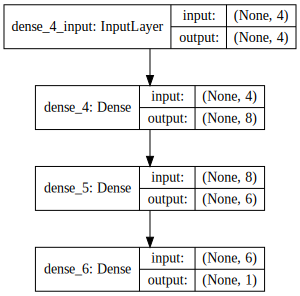

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![model](http://tykimos.github.io/Keras/warehouse/2017-1-27-MLP_Layer_Talk_model.svg)

---

### 요약

신경망의 기본인 뉴런에 대해서 알아보고, 이를 다양한 방식으로 도식화 해봤습니다. 그리고 다층 퍼셉트론 모델에서 가장 기본이 되는 전결합층인 Dense 레이어와 Dense 레이어를 쌓는 법에 대해서 알아봤습니다.

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)
* 이전 : [딥러닝 이야기/케라스 이야기](https://tykimos.github.io/Keras/2017/01/27/Keras_Talk/)
* 다음 : [딥러닝 모델 이야기/다층 퍼셉트론 모델 만들어보기](https://tykimos.github.io/Keras/2017/02/04/MLP_Getting_Started/)